# Special Topics I Problem Set 4 (Linear Regression)

In this problem set, you will implement linear regression with one variable to predict profits for a restaurant franchise.

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

In the next code block, import all the packages and modules you need.

In [1]:
# Do it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

df = pd.read_csv('./q2dataset.csv')

print(df.head(10))


       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016  

Now first download the data required for this exercise from this [link](#).

The dataframe at your disposal has two columns. The first column is the population of a city and the second column is the profit of a restaurant in that city (A negative value for profit indicates a loss). Store the first column in a variable named ``X_train`` and the second column in a variable named ``y_train``.

In [49]:
# Do it.
X_train = df.iloc[:, 0]
Y_train = df.iloc[:, 1]

print(pd.concat([X_train.head(10), Y_train.head(10)], axis=1))


   6.1101   17.592
0  5.5277   9.1302
1  8.5186  13.6620
2  7.0032  11.8540
3  5.8598   6.8233
4  8.3829  11.8860
5  7.4764   4.3483
6  8.5781  12.0000
7  6.4862   6.5987
8  5.0546   3.8166
9  5.7107   3.2522


## View the variables

Before starting on any task, it is useful to get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

Please print the first $5$ data of the variable ``X_train`` and the type of the variable.

In [50]:
# Do it.
print(X_train[:5])



0    5.5277
1    8.5186
2    7.0032
3    5.8598
4    8.3829
Name: 6.1101, dtype: float64


``X_train`` contains decimal values that are all greater than zero.
- These values represent the city population times $10000$
- For example, $6.1101$ means that the population for that city is $61101$

Now, please print the first $5$ data of the variable ``y_train`` and the type of the variable.

In [51]:
# Do it.
print(Y_train[:5])

0     9.1302
1    13.6620
2    11.8540
3     6.8233
4    11.8860
Name: 17.592, dtype: float64


Similarly, ``y_train`` has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of $\$10000$.
  - For example, $17.592$ represents $\$175920$ in average monthly profits for that city.
  - $-2.6807$ represents $-\$26807$ in average monthly loss for that city.

## Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `X_train` and `y_train` and see how many training examples you have in your dataset.

In [52]:
# Do it.
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print(len(df))



X_train shape:  (96,)
Y_train shape:  (96,)
96


## Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (**profit** and **population**). 
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales). When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


In the next code block, please create a scatter plot of the data.

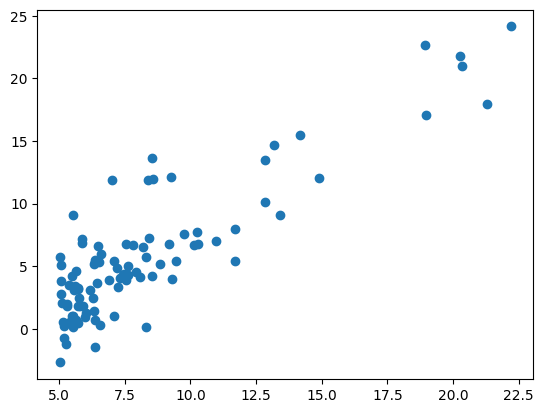

In [53]:
# Do it.
plt.scatter(X_train, Y_train)
plt.show()

Your goal is to build a linear regression model to fit this data.
- With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

## Refresher on linear regression

In this problem set, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

## Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

### Cost function

As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

### Implementation

Please complete the ``compute_cost()`` function below to compute the cost $J(w,b)$.

Complete the ``compute_cost`` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator.

In [54]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    # You need to return this variable correctly
    total_cost = 0

    # Do it.
    # make a prediction using current parameters
    predictions = w * x + b

    # compute square errors
    square_errors = (predictions - y)**2 

    # mean square error
    total_cost = (1 / (2 * m)) * np.sum(square_errors)
    
    return total_cost

## Gradient descent

In this section, you will implement the gradient for parameters $w, b$ for linear regression.

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

### Implementation

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [55]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities)
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples
    m = x.shape[0]

    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0

    # Do it.
    diffs = w*x + b - y

    dj_dw = (1/m) * np.sum(diffs * x)
    dj_db = (1/m) * np.sum(diffs)

    return dj_dw, dj_db

Now let's run the gradient descent algorithm implemented above on our dataset.

In [56]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, Y_train, test_w, test_b)

print("Gradient at test w, b:", tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -46.88085020596874 -3.880479166666666


### Learning parameters using batch gradient descent

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [57]:
def gradient_descent(
    x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters
):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x: (ndarray) Shape (m,)
      y: (ndarray) Shape (m,)
      w_in, b_in: (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha: (float) Learning rate
      num_iters: (int) number of iterations to run gradient descent
    
    Returns:
      w: (ndarray) Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b: (scalar) Updated value of parameter of the model after running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history  # return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [58]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.0
initial_b = 0.0

# some gradient descent settings
iterations = 1500
alpha = 0.01

w, b, _, _ = gradient_descent(
    X_train,
    Y_train,
    initial_w,
    initial_b,
    compute_cost,
    compute_gradient,
    alpha,
    iterations,
)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     5.90   
Iteration  150: Cost     4.43   
Iteration  300: Cost     4.02   
Iteration  450: Cost     3.79   
Iteration  600: Cost     3.65   


Iteration  750: Cost     3.57   
Iteration  900: Cost     3.52   
Iteration 1050: Cost     3.50   
Iteration 1200: Cost     3.48   
Iteration 1350: Cost     3.47   
w,b found by gradient descent: 1.1849957023502022 -3.926439005456633


We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [59]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

We will now plot the predicted values to see the linear fit.

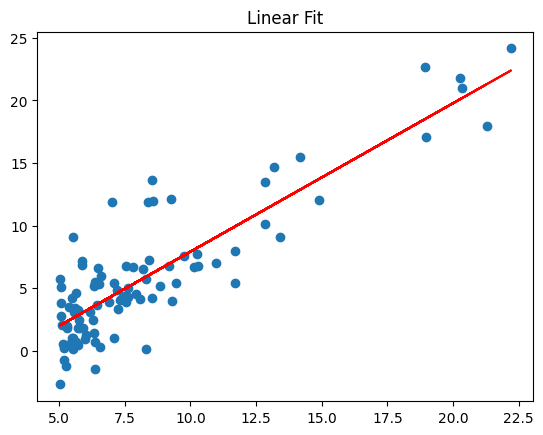

In [64]:
# Do it.

plt.scatter(X_train, Y_train)
plt.plot(X_train, predicted, color='red')
plt.title('Linear Fit')
plt.show()


Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of $35000$ and $70000$ people. 

- The model takes in population of a city in 10000s as input. 

- Therefore, $35000$ people can be translated into an input to the model as $3.5$

- Similarly, $70000$ people can be translated into an input to the model as $7$


In [70]:
# Do it.
# Predict profit for a city with population of 35000
pop1 = 3.5
profit1 = w * pop1 + b
print(f"Predicted profit for a city with population of 35000: {profit1 * 10000:,.2f}$")

# Predict profit for a city with population of 70000
pop2 = 7
profit2 = w * pop2 + b
print(f"Predicted profit for a city with population of 70000: {profit2 * 10000:,.2f}$")


Predicted profit for a city with population of 35000: 2,210.46$
Predicted profit for a city with population of 70000: 43,685.31$
